In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import collections
import matplotlib
%matplotlib inline

## Explore Data

In [2]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_weighted['status'].unique()

array(['jurisdiction', 'intermediary_base', 'intermediary_jurisdiction',
       'officer_base', 'officer_jurisdiction'], dtype=object)

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'officer_jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
221026,Jersey,British Virgin Islands
221027,China,British Virgin Islands
221028,China,British Virgin Islands
221029,United States,British Virgin Islands
221030,Indonesia,British Virgin Islands
...,...,...
221136,Indonesia,Samoa
221137,Cayman Islands,Samoa
221138,British Virgin Islands,Samoa
221139,China,Samoa


In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,British Virgin Islands,Cook Islands,1
1,British Virgin Islands,Samoa,1
2,British Virgin Islands,Seychelles,1
3,Canada,British Virgin Islands,1
4,Cayman Islands,British Virgin Islands,1
5,Cayman Islands,Samoa,1
6,China,British Virgin Islands,15
7,China,Labuan,1
8,China,Samoa,2
9,China,Singapore,1


### Convert Data to an Undirected Edge List

In [7]:
# df_jur_grouped_list = df_jur_grouped.values.tolist()
# df_jur_grouped_list

In [8]:
# d = collections.defaultdict(int)
# for n1, n2, v in df_jur_grouped_list:
#     d[min(n1, n2), max(n1, n2)] += v
# result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
# df_net = pd.DataFrame(result)
# df_net

In [10]:
# df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
# df_net

In [11]:
#df_net.to_csv('undirected_weighted_grouped.csv', index = False)

In [12]:
# df_net.describe()

## Create Graph

In [13]:
g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


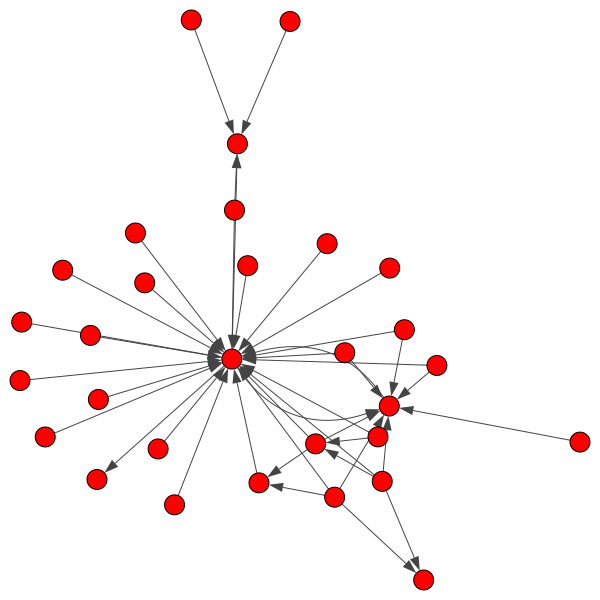

In [14]:
ig.plot(g)

In [15]:
g.diameter()

3

In [16]:
print( "Clustering Coefficient: ", g.transitivity_undirected())

Clustering Coefficient:  0.09863013698630137


In [17]:
np.mean(g.degree())

2.8

In [18]:
np.mean(g.strength(weights = 'weight'))

7.666666666666667

In [19]:
df_strength = pd.DataFrame({'name': list(g.vs['name']), 'weighted_degree':g.strength(weights = 'weight') } )
df_strength = df_strength.sort_values('weighted_degree', ascending = False).reset_index(drop = True)
df_strength

,name,weighted_degree
0,British Virgin Islands,97.0
1,Taiwan,25.0
2,China,19.0
3,Hong Kong,14.0
4,Samoa,10.0
5,Indonesia,10.0
6,United States,9.0
7,Singapore,7.0
8,Cook Islands,5.0
9,India,5.0


## Metrics

In [19]:
def get_diameter(community):
    
    diameters = []
    
    for i in range(len(community.subgraphs())):
    
        diameters.append(community.subgraphs()[i].diameter())

    return (diameters)

In [20]:
def get_transitivity(community):
    
    transitivity = []
    
    for i in range(len(community.subgraphs())):
    
        transitivity.append(community.subgraphs()[i].transitivity_undirected())

    return (transitivity)

In [21]:
def get_avg_degree(community):
    
    degree = []
    
    for i in range(len(community.subgraphs())):
    
        degree.append(np.mean(community.subgraphs()[i].degree()))

    return degree

In [22]:
def get_avg_weighted_degree(community):
    
    weighted_degree = []
    
    for i in range(len(community.subgraphs())):
    
        weighted_degree.append(np.mean(community.subgraphs()[i].strength(weights = 'weight')))

    return weighted_degree

## Community Detection

In [23]:
# Define colors used for visualization
colors = ['blue', 'yellow', 'green','purple', 'pink', 'orange', 'lightcoral', 'plum', 'darkgreen', 'darkblue', 'rosybrown',
         'crimson', 'steelblue', 'khaki', 'moccasin', 'orangered', 'fuchsia', 'thistle', 'salmon', 'chocolate', 'lightseagreen',
         'springgreen', 'darkseagreen', 'deeppink', 'mediumvioletred','olive']

### Label Propogation Community Detection

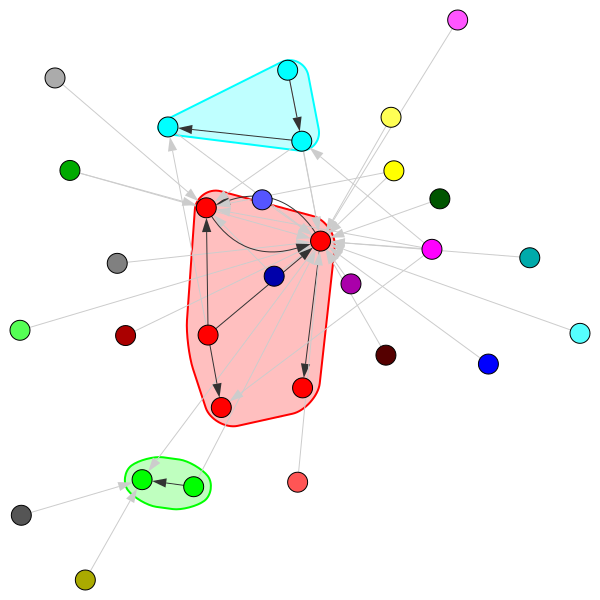

In [24]:
comm_lp= g.community_label_propagation(weights = 'weight')

ig.plot(comm_lp, mark_groups = True, layout="drl")

In [25]:
modularity = g.modularity(comm_lp, weights='weight')
print(modularity)

0.0279773156899811


In [26]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_lp))
print('average degree: ', get_avg_degree(comm_lp))
print('transitivity: ', get_transitivity(comm_lp))
print('diameter: ', get_diameter(comm_lp))

average weighted degree:  [10.8, 2.0, 0.0, 0.0, 0.0, 1.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [2.4, 1.0, 0.0, 0.0, 0.0, 1.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
transitivity:  [0.42857142857142855, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
diameter:  [2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Leading Eigenvector Community Detection

/Users/susankoruthu/opt/anaconda3/lib/python3.8/site-packages/igraph/__init__.py:1281: RuntimeWarning: This method was developed for undirected graphs at src/community/leading_eigenvector.c:530
  membership, _, q = GraphBase.community_leading_eigenvector(


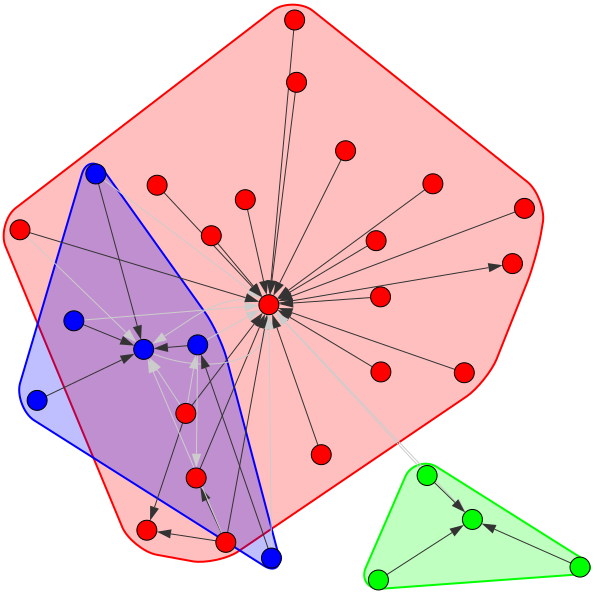

In [27]:
comm_leading_eigenvector= g.community_leading_eigenvector(weights = 'weight')

ig.plot(comm_leading_eigenvector, mark_groups = True, layout="drl")

In [28]:
modularity = g.modularity(comm_leading_eigenvector, weights='weight')
print(modularity)

0.10638941398865785


In [29]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_leading_eigenvector))
print('average degree: ', get_avg_degree(comm_leading_eigenvector))
print('transitivity: ', get_transitivity(comm_leading_eigenvector))
print('diameter: ', get_diameter(comm_leading_eigenvector))

average weighted degree:  [8.1, 2.0, 1.6666666666666667]
average degree:  [2.1, 1.5, 1.6666666666666667]
transitivity:  [0.018867924528301886, 0.0, 0.0]
diameter:  [2, 1, 2]


In [30]:
df_leading_eigenvector = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_leading_eigenvector.membership } )
df_leading_eigenvector

,name,community
0,British Virgin Islands,0
1,Cook Islands,1
2,Samoa,2
3,Seychelles,0
4,Canada,0
5,Cayman Islands,2
6,China,0
7,Labuan,0
8,Singapore,2
9,Czech Republic,0


In [31]:
df_leading_eigenvector.describe()

,community
count,30.000000
mean,0.533333
std,0.819307
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


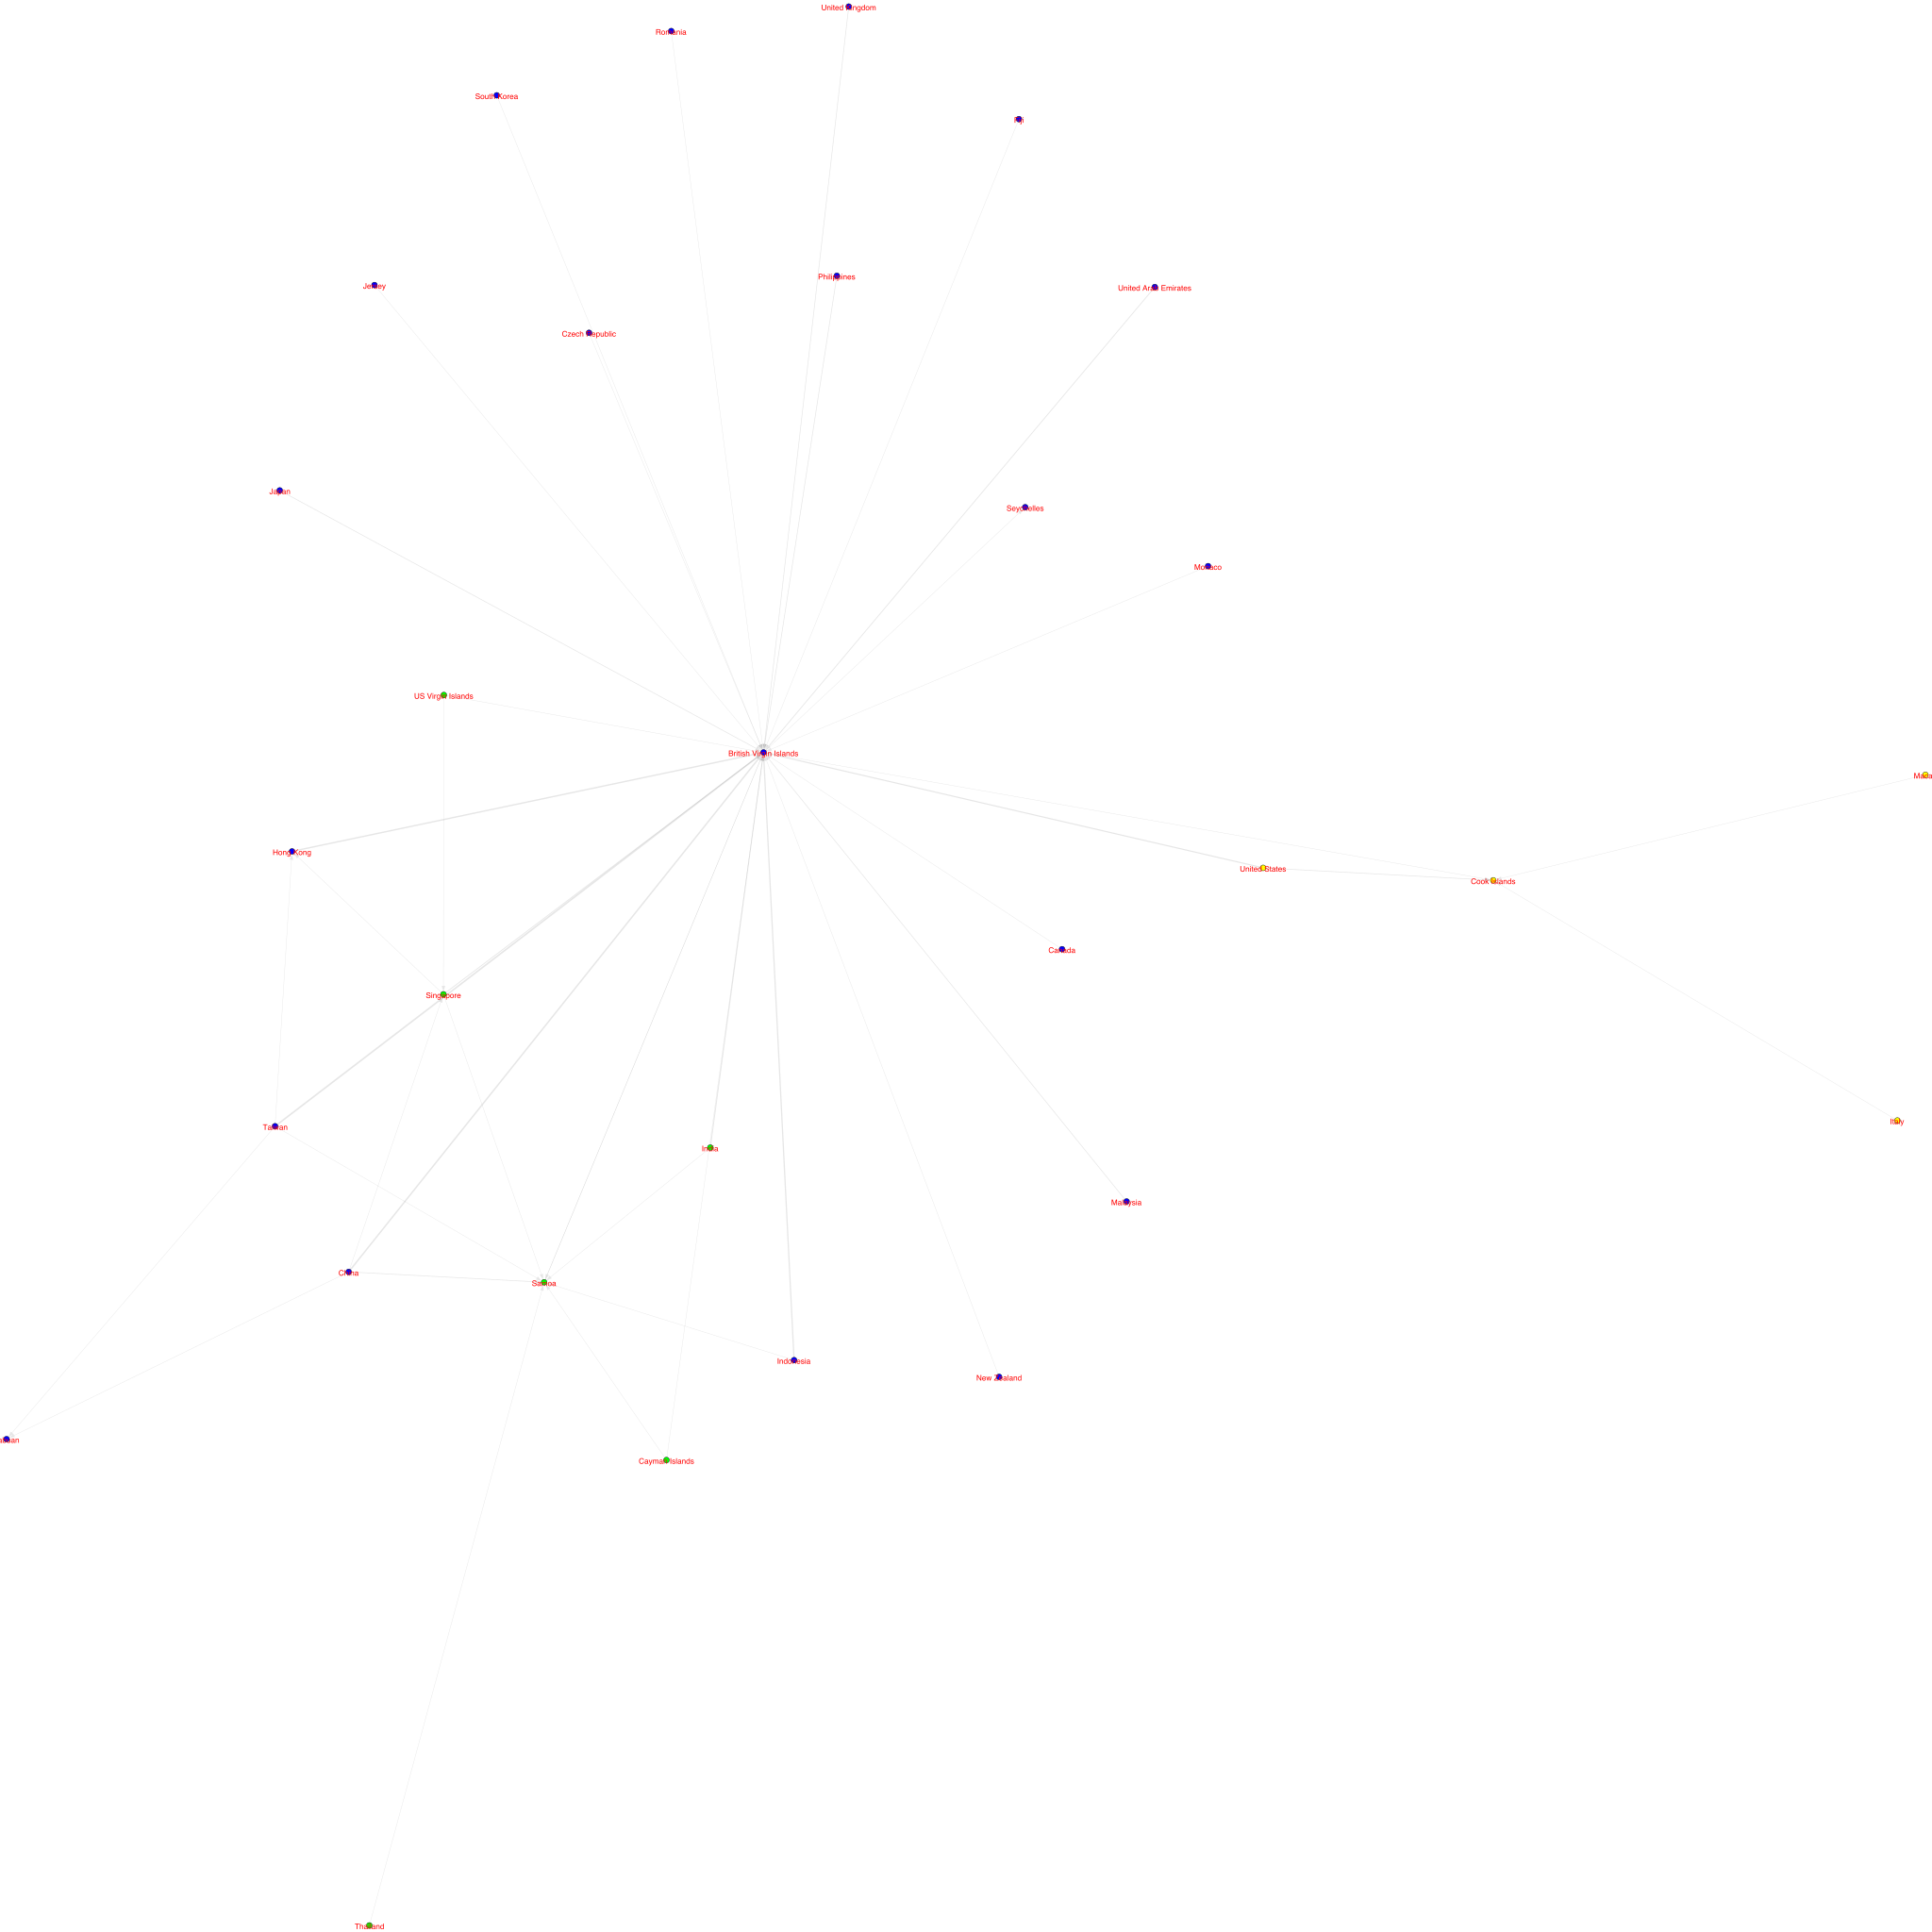

In [32]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_leading_eigenvector.membership)):
    vertex_colors.append(colors[comm_leading_eigenvector.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_officer_jur_images/communities_leading_eigenvector.png', vertex_label = g.vs['name'] , **visual_style)

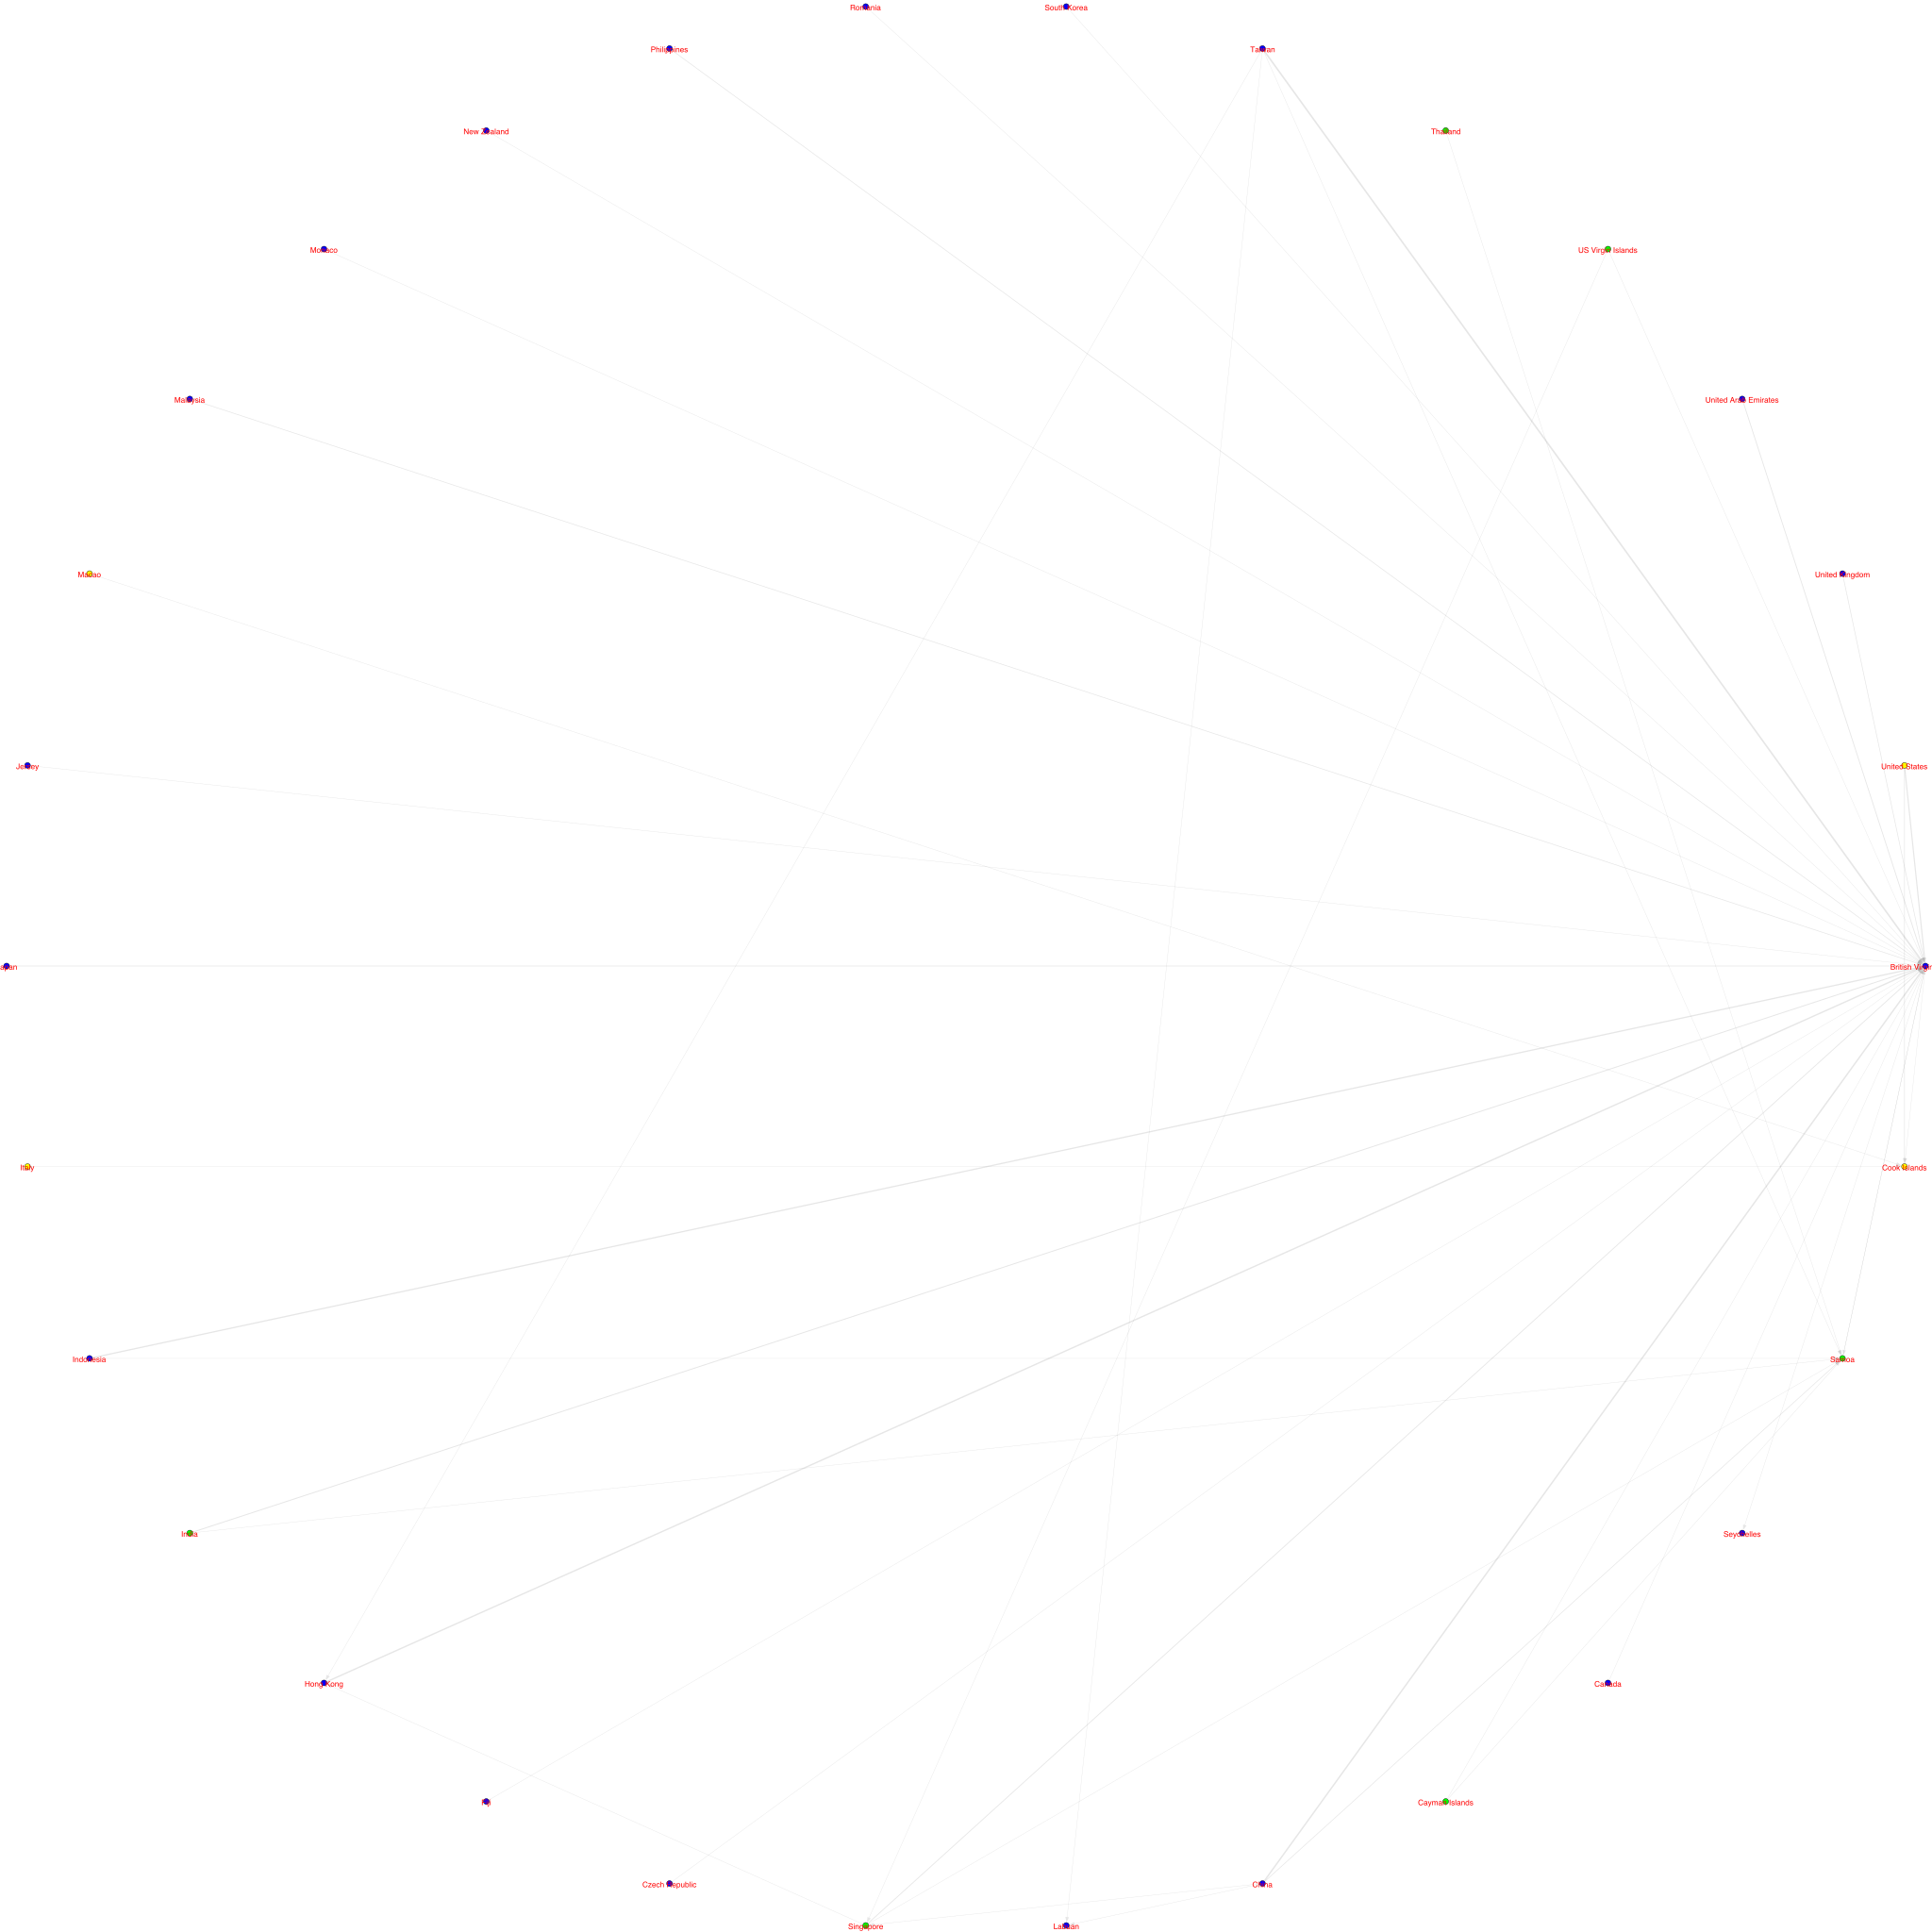

In [33]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_officer_jur_images/leading_vector_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [34]:
for i in range(len(comm_leading_eigenvector.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_leading_eigenvector.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_leading_eigenvector.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_leading_eigenvector.subgraphs()[i],'directed_officer_jur_images/leading_eigenvector_subgraph' + str(i) + '.png' ,vertex_label = comm_leading_eigenvector.subgraphs()[i].vs['name'],**visual_style  )
    

### Spinglass Community Detection

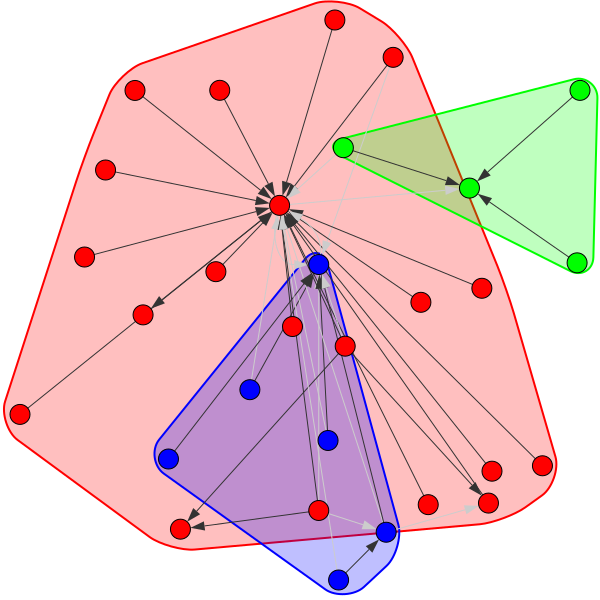

In [35]:
comm_spinglass = g.community_spinglass(weights = 'weight')

ig.plot(comm_spinglass, mark_groups = True, layout="drl")

In [36]:
modularity = g.modularity(comm_spinglass, weights='weight')
print(modularity)

0.10638941398865785


In [37]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_spinglass))
print('average degree: ', get_avg_degree(comm_spinglass))
print('transitivity: ', get_transitivity(comm_spinglass))
print('diameter: ', get_diameter(comm_spinglass))

average weighted degree:  [8.1, 2.0, 1.6666666666666667]
average degree:  [2.1, 1.5, 1.6666666666666667]
transitivity:  [0.018867924528301886, 0.0, 0.0]
diameter:  [2, 1, 2]


In [38]:
df_spinglass = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_spinglass.membership } )
df_spinglass

,name,community
0,British Virgin Islands,0
1,Cook Islands,1
2,Samoa,2
3,Seychelles,0
4,Canada,0
5,Cayman Islands,2
6,China,0
7,Labuan,0
8,Singapore,2
9,Czech Republic,0


In [39]:
df_spinglass.describe()

,community
count,30.000000
mean,0.533333
std,0.819307
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


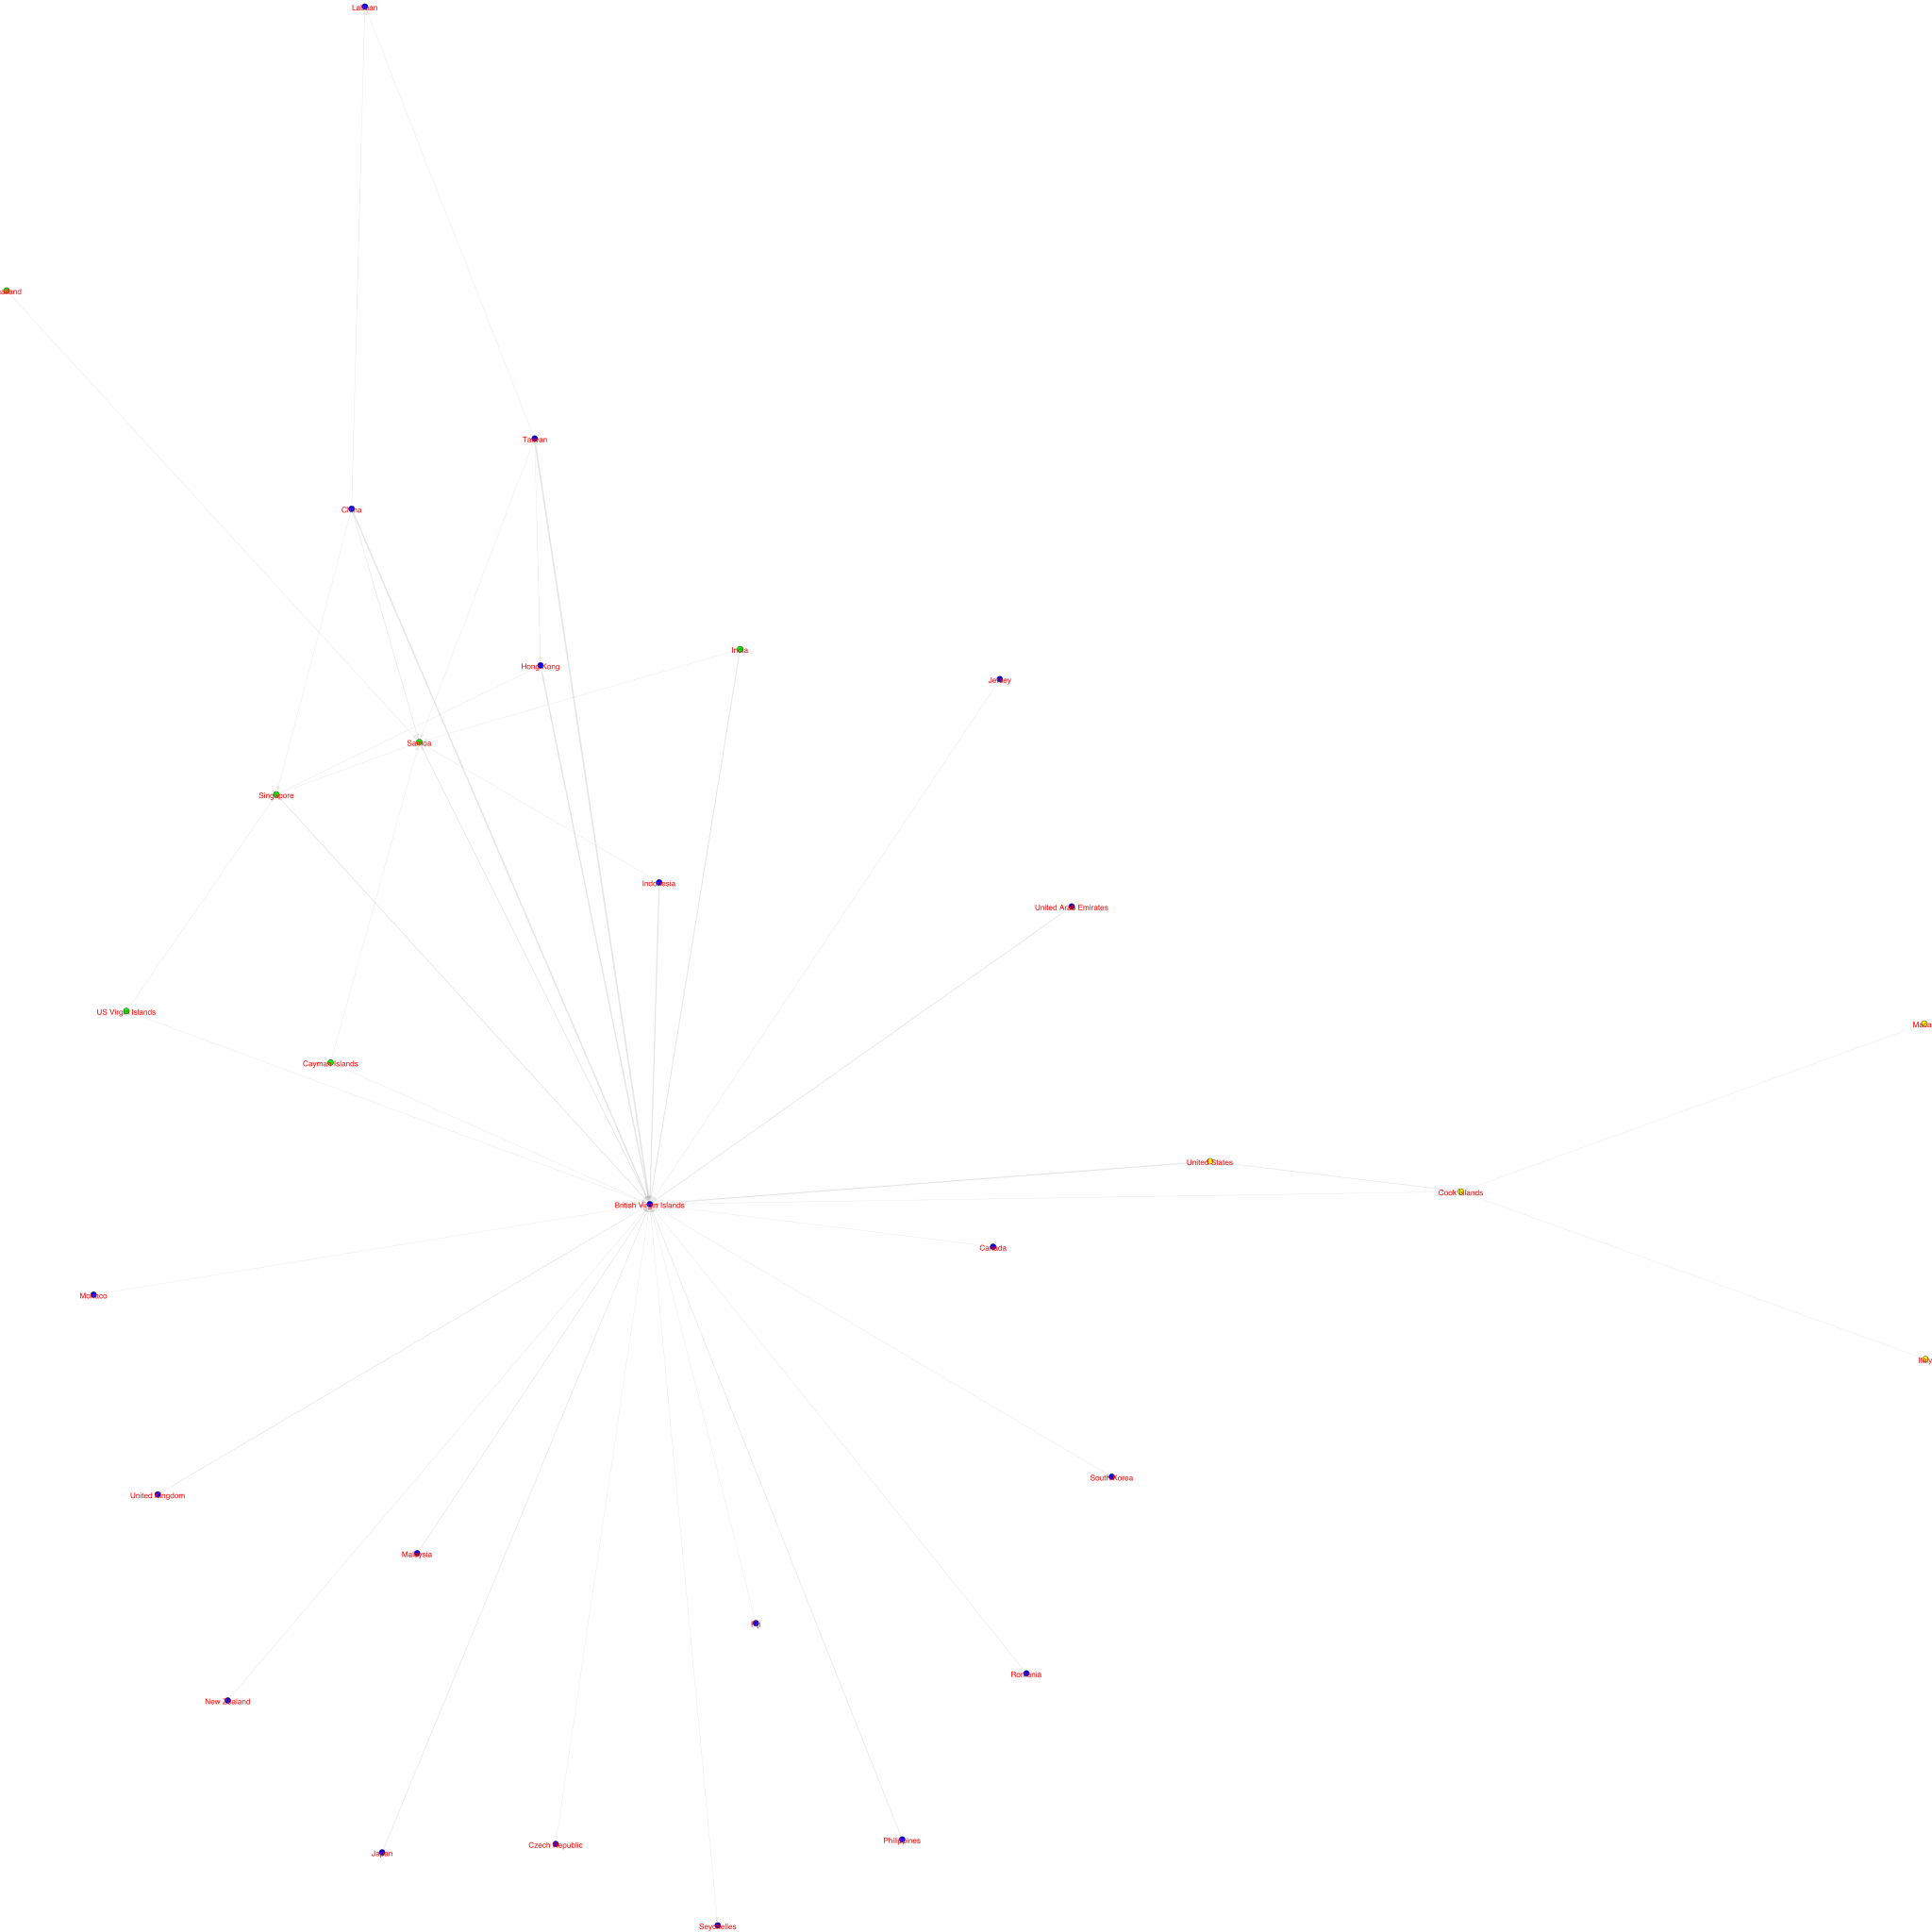

In [40]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_spinglass.membership)):
    vertex_colors.append(colors[comm_spinglass.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_officer_jur_images/communities_spinglass.png', vertex_label = g.vs['name'] , **visual_style)

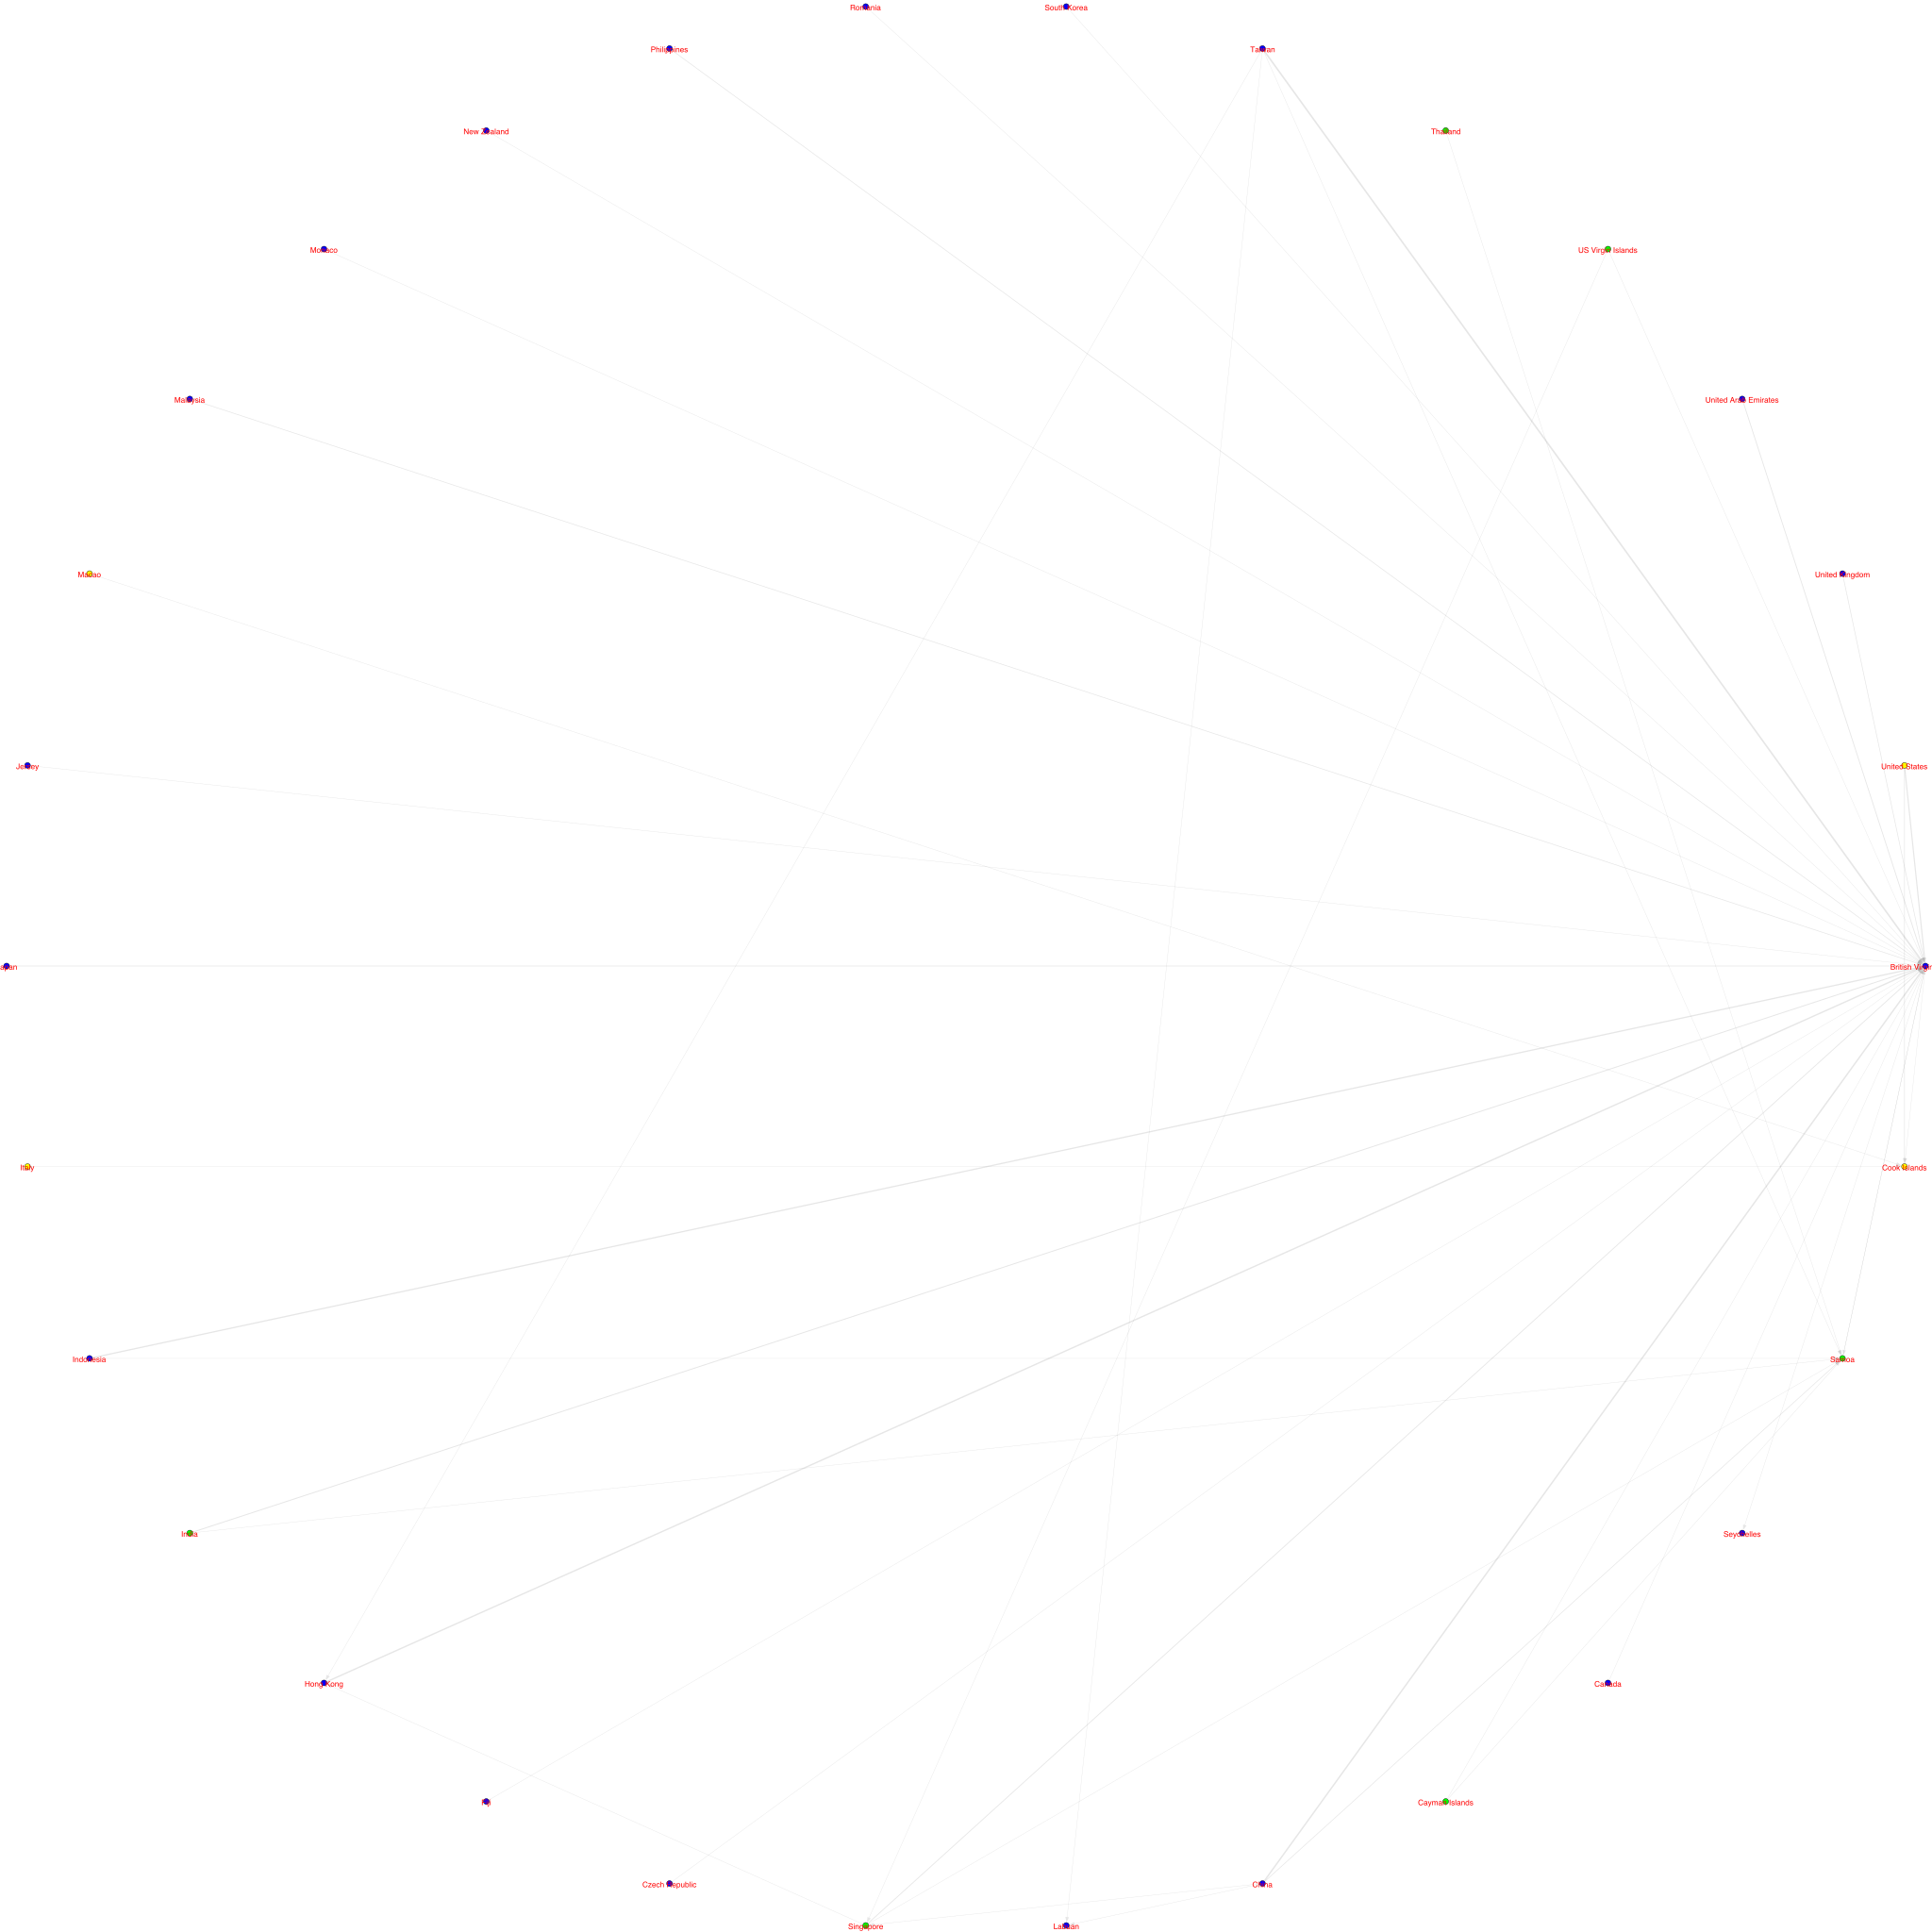

In [41]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_officer_jur_images/spinglass_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [42]:
for i in range(len(comm_spinglass.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_spinglass.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_spinglass.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_spinglass.subgraphs()[i],'directed_officer_jur_images/spinglass_subgraph' + str(i) + '.png' ,vertex_label = comm_spinglass.subgraphs()[i].vs['name'],**visual_style  )
    

### Walktrap Community Detection

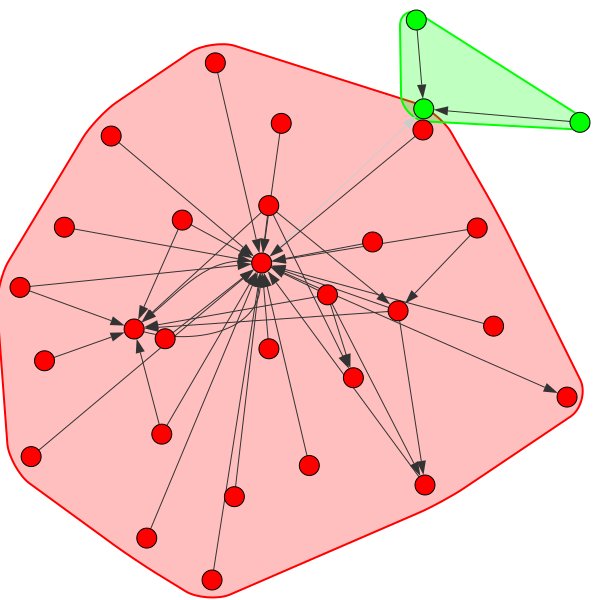

In [43]:
walktrap = g.community_walktrap(weights = 'weight', steps = 2)

comm_walktrap = walktrap.as_clustering()

ig.plot(comm_walktrap, mark_groups = True, layout="drl")

In [44]:
modularity = g.modularity(comm_walktrap, weights='weight')
print(modularity)

0.03327032136105858


In [45]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_walktrap))
print('average degree: ', get_avg_degree(comm_walktrap))
print('transitivity: ', get_transitivity(comm_walktrap))
print('diameter: ', get_diameter(comm_walktrap))

average weighted degree:  [8.148148148148149, 1.3333333333333333]
average degree:  [2.814814814814815, 1.3333333333333333]
transitivity:  [0.09880239520958084, 0.0]
diameter:  [3, 1]


In [46]:
df_walktrap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_walktrap.membership } )
df_walktrap

,name,community
0,British Virgin Islands,0
1,Cook Islands,1
2,Samoa,0
3,Seychelles,0
4,Canada,0
5,Cayman Islands,0
6,China,0
7,Labuan,0
8,Singapore,0
9,Czech Republic,0


In [47]:
df_walktrap.describe()

,community
count,30.000000
mean,0.100000
std,0.305129
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


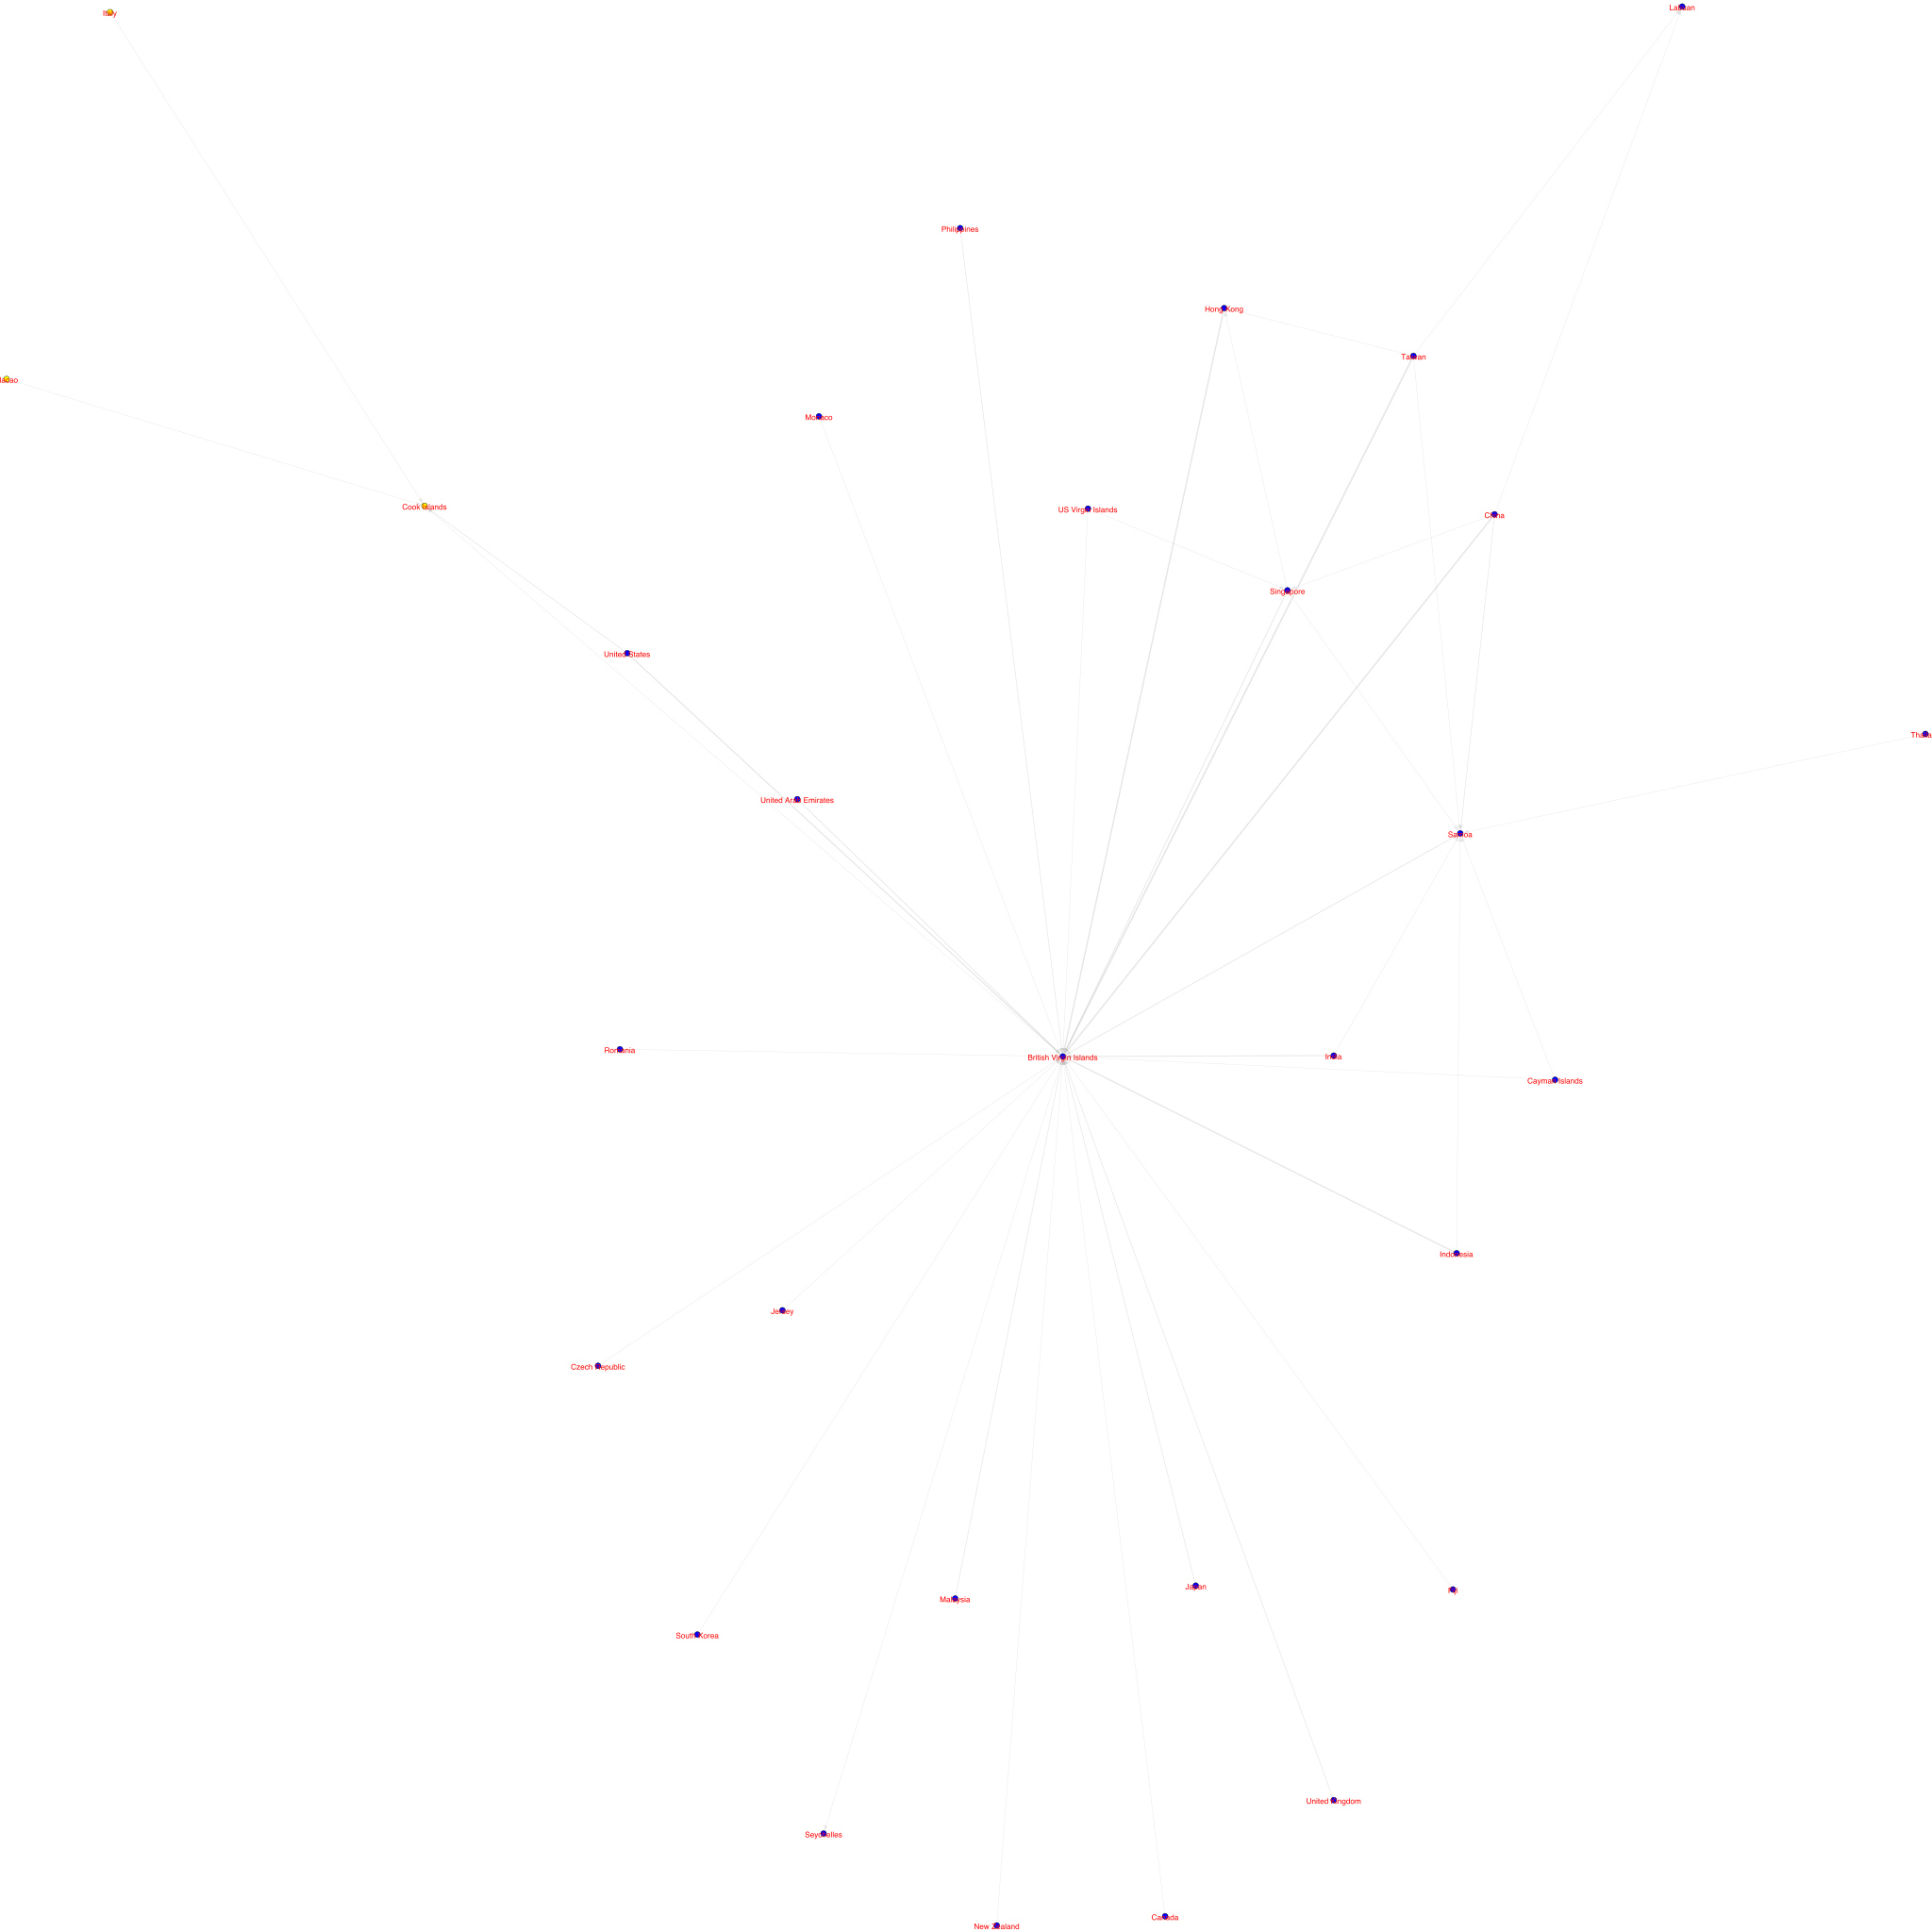

In [48]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_walktrap.membership)):
    vertex_colors.append(colors[comm_walktrap.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_officer_jur_images/communities_walktrap.png', vertex_label = g.vs['name'] , **visual_style)

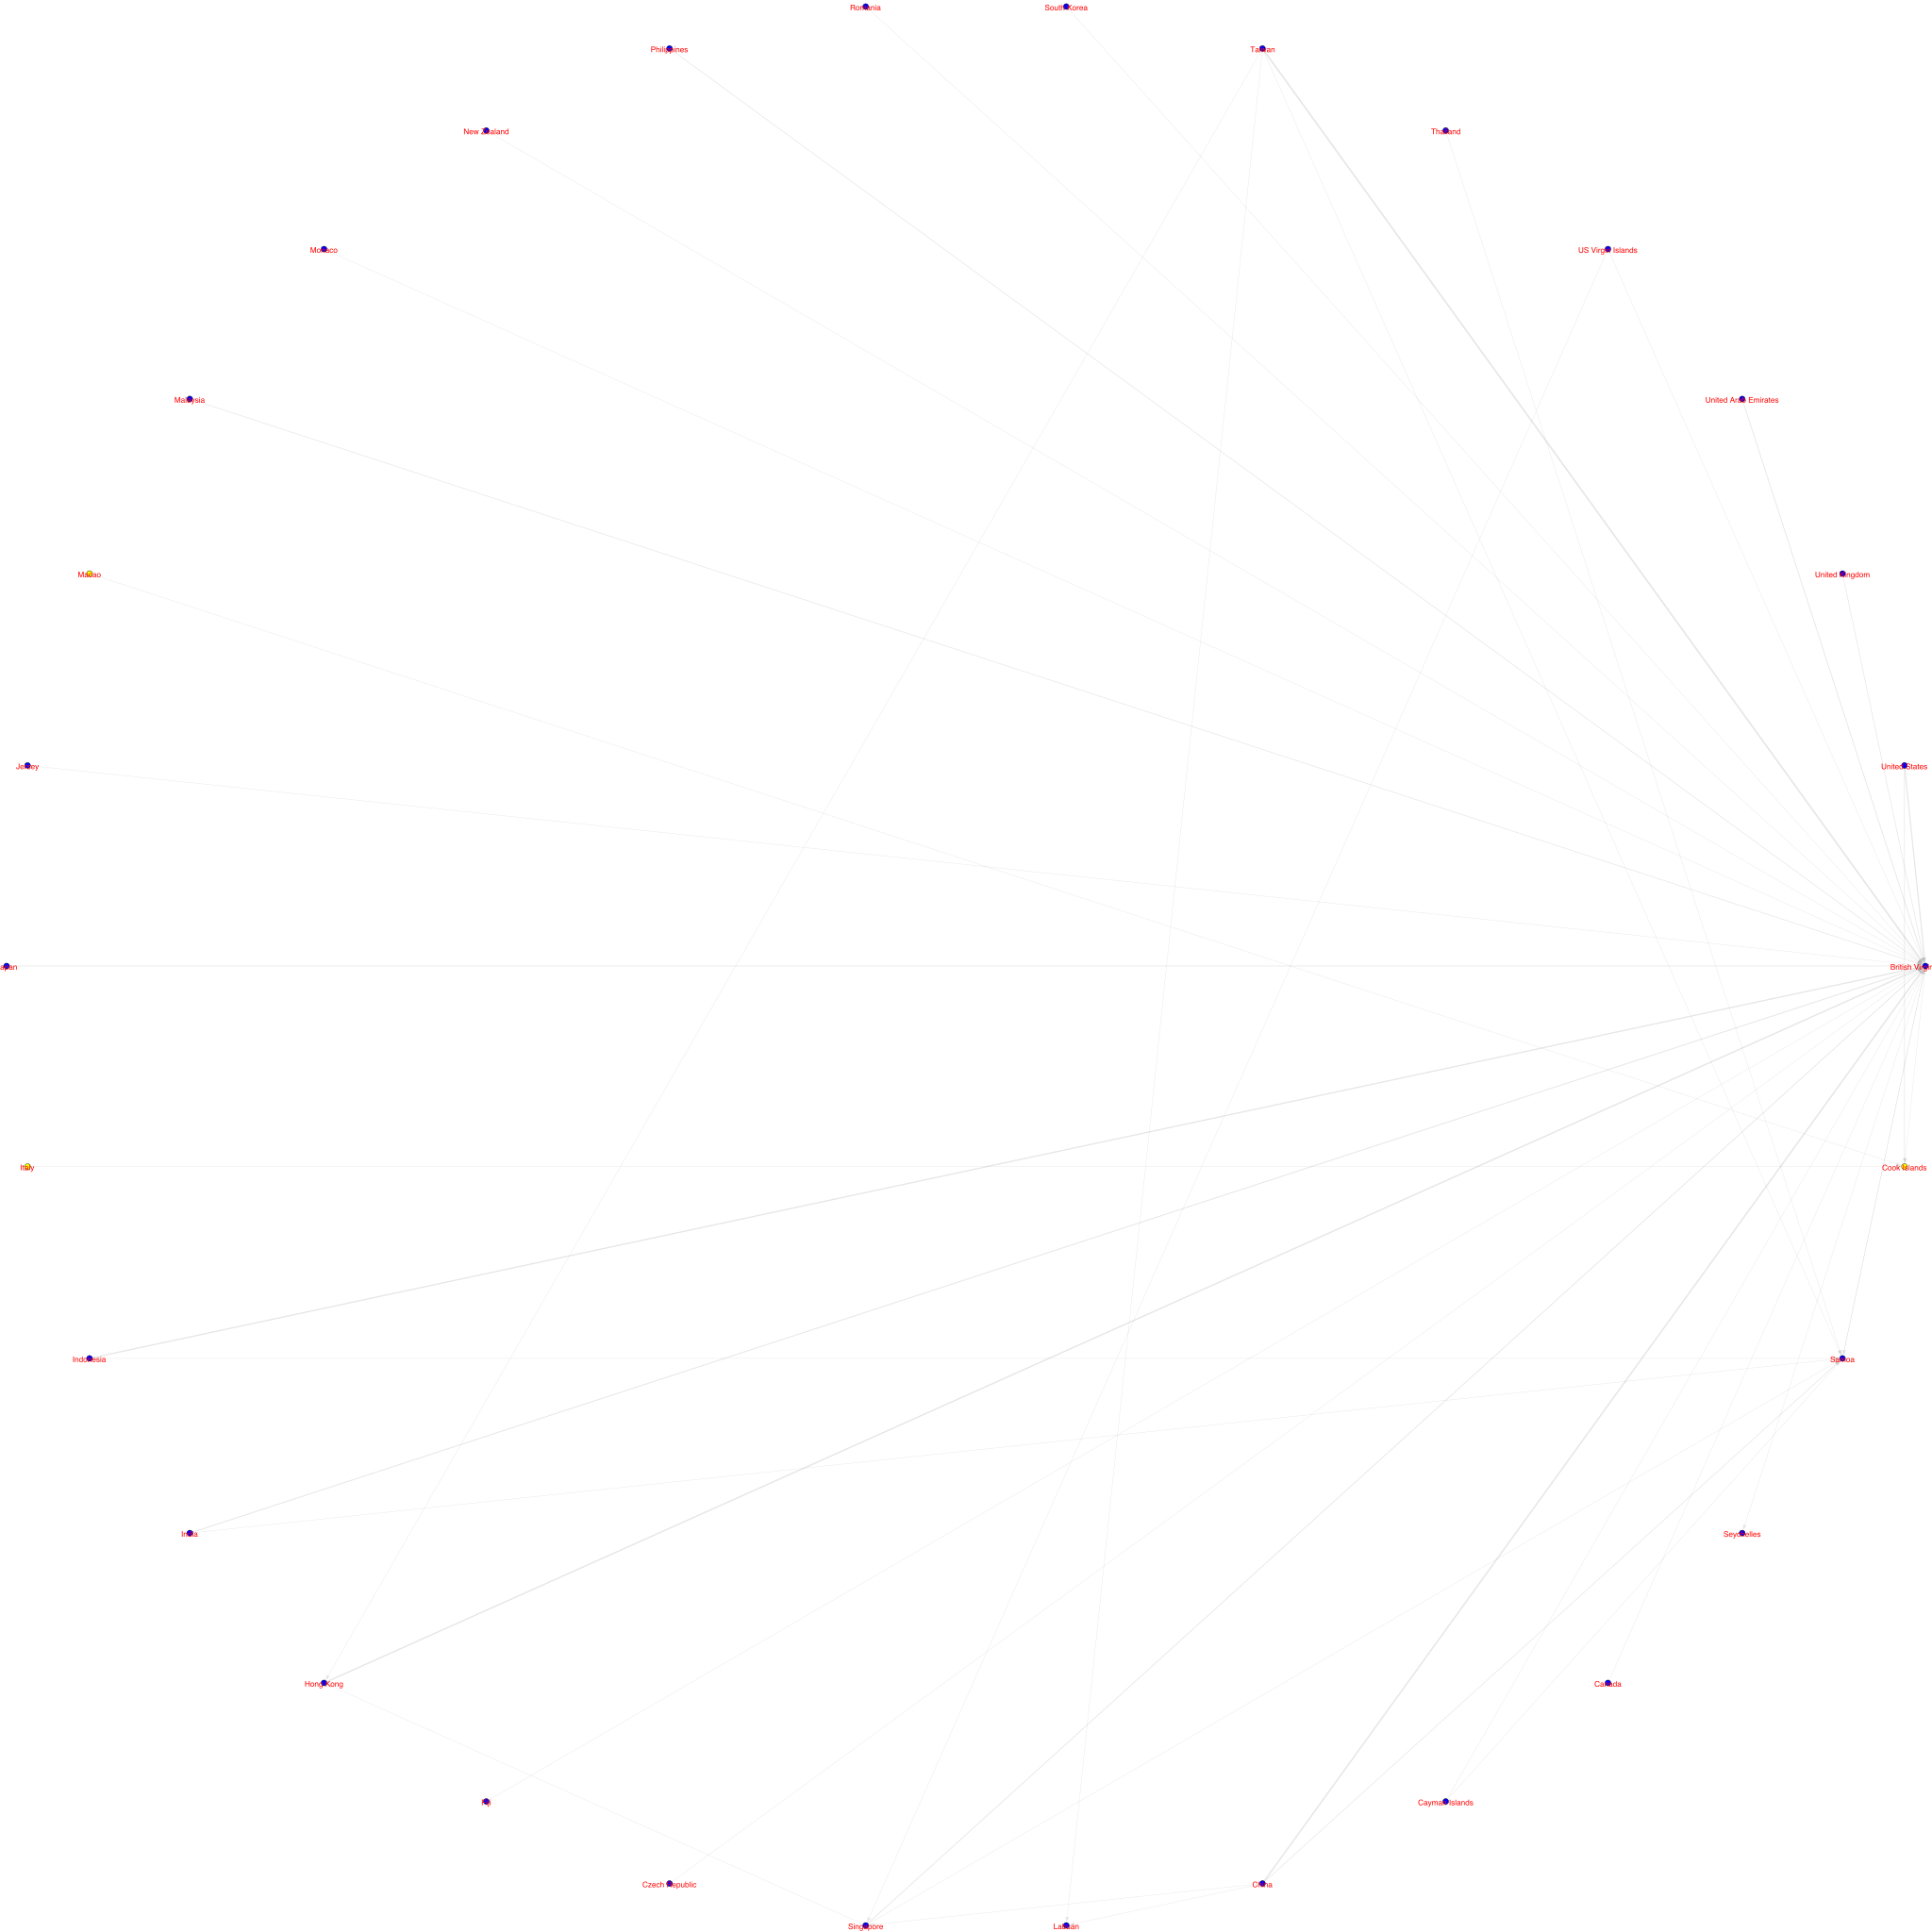

In [49]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'directed_officer_jur_images/walktrap_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [50]:
for i in range(len(comm_walktrap.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_walktrap.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_walktrap.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_walktrap.subgraphs()[i],'directed_officer_jur_images/walktrap_subgraph' + str(i) + '.png' ,vertex_label = comm_walktrap.subgraphs()[i].vs['name'],**visual_style  )
    

### Infomap Community Detection

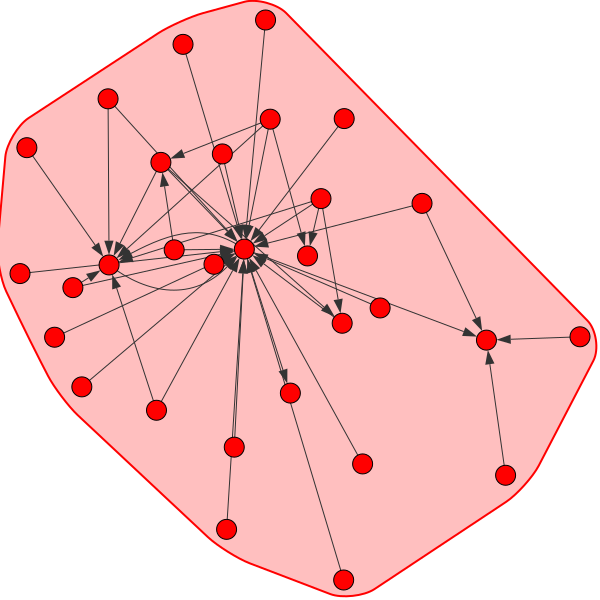

In [51]:
comm_infomap = g.community_infomap(edge_weights = 'weight')

ig.plot(comm_infomap, mark_groups = True, layout="drl")

In [52]:
modularity = g.modularity(comm_infomap, weights='weight')
print(modularity)

0.0


In [53]:
#get metrics for each community

print('average weighted degree: ', get_avg_weighted_degree(comm_infomap))
print('average degree: ', get_avg_degree(comm_infomap))
print('transitivity: ', get_transitivity(comm_infomap))
print('diameter: ', get_diameter(comm_infomap))

average weighted degree:  [7.666666666666667]
average degree:  [2.8]
transitivity:  [0.09863013698630137]
diameter:  [3]


In [54]:
df_infomap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_infomap.membership } )
df_infomap

,name,community
0,British Virgin Islands,0
1,Cook Islands,0
2,Samoa,0
3,Seychelles,0
4,Canada,0
5,Cayman Islands,0
6,China,0
7,Labuan,0
8,Singapore,0
9,Czech Republic,0


In [55]:
## no visualisation since no community is detected